In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [27]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [28]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [29]:
df.duplicated().sum()

np.int64(0)

In [30]:
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]
features.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [31]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

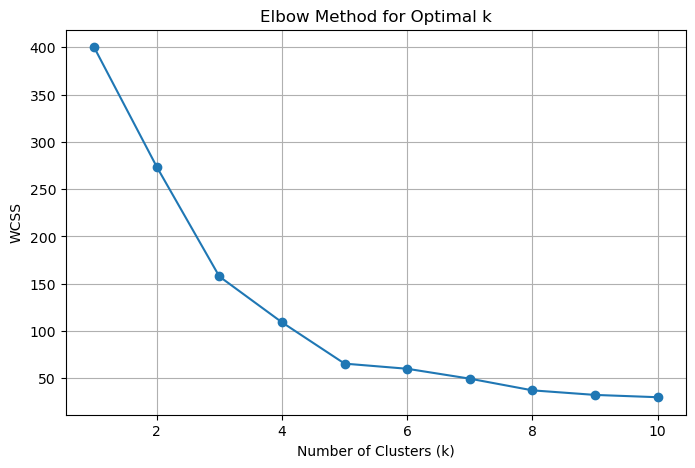

In [32]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [33]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    print(f'For k={k}, Silhouette Score: {score}')

For k=2, Silhouette Score: 0.3973270007887498
For k=3, Silhouette Score: 0.46658474419000145
For k=4, Silhouette Score: 0.49434988482196784
For k=5, Silhouette Score: 0.5546571631111091
For k=6, Silhouette Score: 0.5138257534676561
For k=7, Silhouette Score: 0.50200146805547
For k=8, Silhouette Score: 0.4550112502601921
For k=9, Silhouette Score: 0.4566624374485964
For k=10, Silhouette Score: 0.44475993501732874


In [34]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


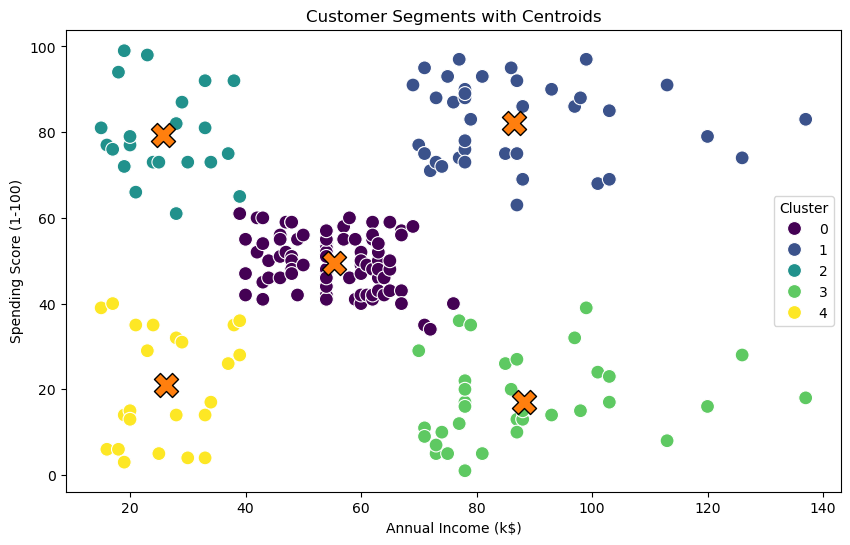

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=df['Annual Income (k$)'], 
    y=df['Spending Score (1-100)'], 
    hue=df['Cluster'], 
    palette='viridis', 
    s=100
)

centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(
    centroids_original[:, 0], 
    centroids_original[:, 1],
    marker='X',
    s=300,
    edgecolor='black'
)

plt.title('Customer Segments with Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [36]:
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_summary

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


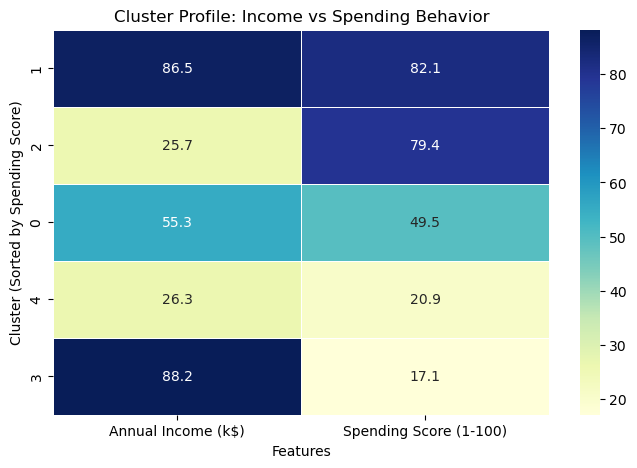

In [37]:
cluster_profile = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_profile = cluster_profile.sort_values(by='Spending Score (1-100)', ascending=False)

plt.figure(figsize=(8,5))
sns.heatmap(cluster_profile, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)

plt.title("Cluster Profile: Income vs Spending Behavior")
plt.xlabel("Features")
plt.ylabel("Cluster (Sorted by Spending Score)")
plt.show()

#BONUS

In [38]:
features = ['Annual Income (k$)', 'Spending Score (1-100)']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

In [39]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'].value_counts()

DBSCAN_Cluster
 0    157
 1     35
-1      8
Name: count, dtype: int64

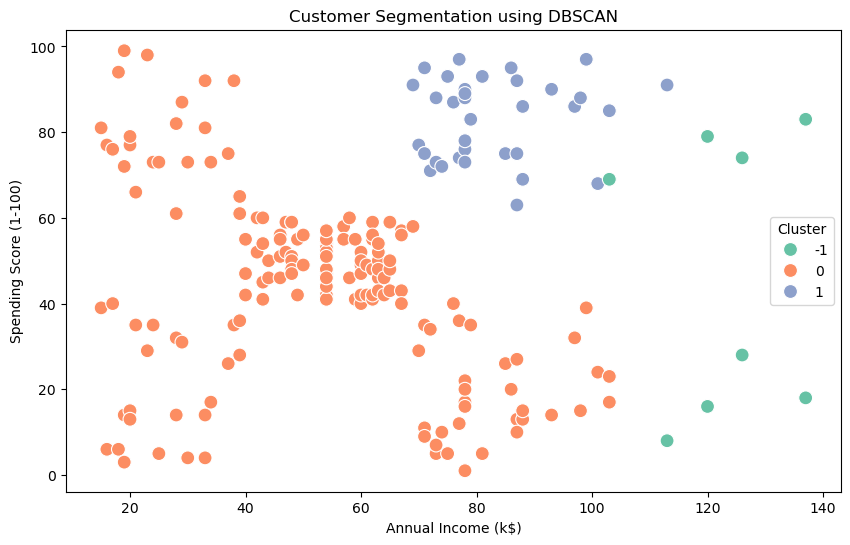

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='DBSCAN_Cluster',
    palette='Set2',
    s=100
)
plt.title('Customer Segmentation using DBSCAN')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [41]:
df.groupby('DBSCAN_Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Annual Income (k$),Spending Score (1-100)
DBSCAN_Cluster,,
-1,122.750000,46.875000
0,52.490446,43.101911
1,82.542857,82.800000


In [42]:
comparison = df.groupby(['Cluster', 'DBSCAN_Cluster'])[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
comparison

Annual Income (k$)  Spending Score (1-100)
Cluster DBSCAN_Cluster                                            
0        0                       55.296296               49.518519
1       -1                      121.500000               76.250000
         1                       82.542857               82.800000
2        0                       25.727273               79.363636
3       -1                      124.000000               17.500000
         0                       83.580645               17.064516
4        0                       26.304348               20.913043

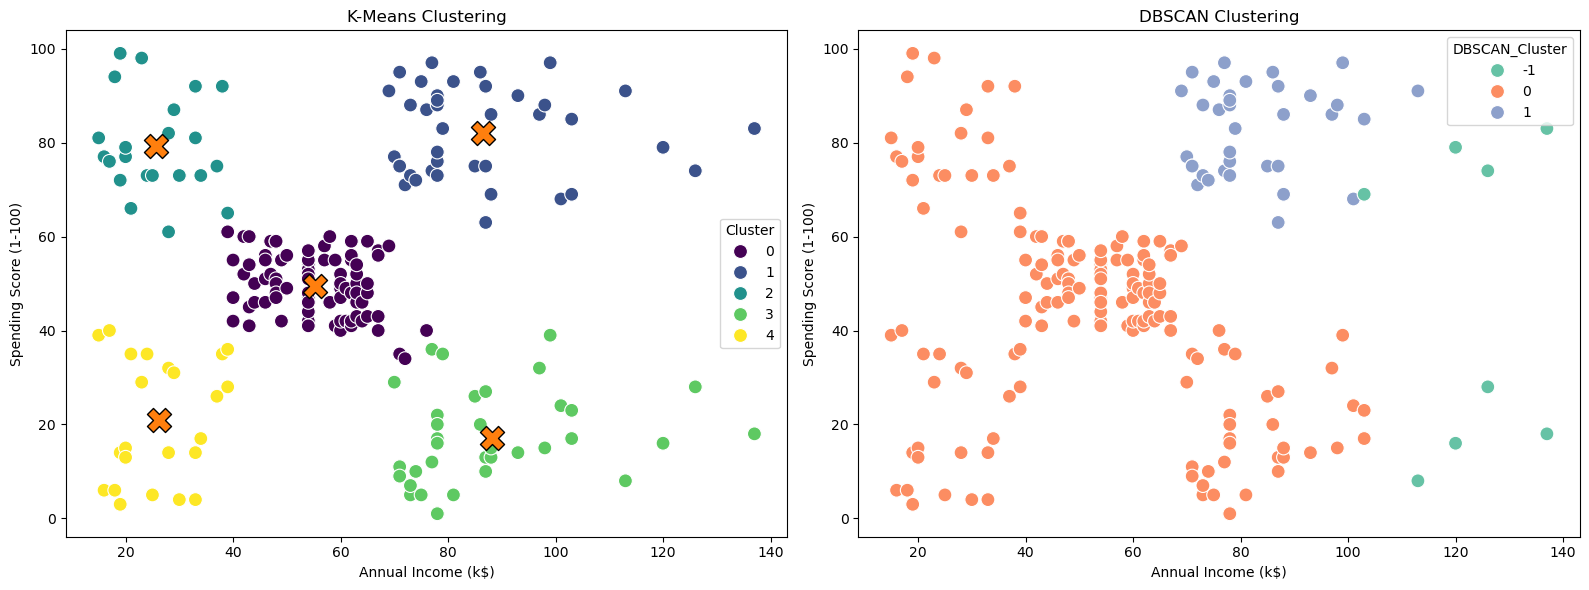

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# K-Means Plot
sns.scatterplot(
    ax=axes[0],
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='viridis',
    s=100
)
axes[0].scatter(
    centroids_original[:, 0], 
    centroids_original[:, 1],
    marker='X',
    s=300,
    edgecolor='black'
)
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1-100)')

# DBSCAN Plot
sns.scatterplot(
    ax=axes[1],
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='DBSCAN_Cluster',
    palette='Set2',
    s=100
)
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()
